In [1]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime
import seaborn as sns
%matplotlib inline
import wrangle as w
import os
import env
import outliers as o
import explore as e
import functions as f

In [2]:
df = w.prep_log_data()

In [3]:
df.head()

,time,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,program_id
date,,,,,,,,,,,,,
2018-01-26,09:55:03,/,1,8,97.105.19.61,8,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1
2018-01-26,09:56:02,java-ii,1,8,97.105.19.61,8,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1
2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8,97.105.19.61,8,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1
2018-01-26,09:56:06,slides/object_oriented_programming,1,8,97.105.19.61,8,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1
2018-01-26,09:56:24,javascript-i/conditionals,2,22,97.105.19.61,22,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2


##  1. Which lesson appears to attract the most traffic consistently across cohorts (per program)?

#### Program 1

In [4]:
f.print_top_lessons1(df)

Top 4 most visited lessons:
Lesson Path: /
Total Traffic: 1681
---------------------------
Lesson Path: index.html
Total Traffic: 1011
---------------------------
Lesson Path: javascript-i
Total Traffic: 736
---------------------------
Lesson Path: html-css
Total Traffic: 542
---------------------------


#### For program 1 the most visited lesson was javascript-1

#### Program 2

In [5]:
f.print_top_lessons2(df)

Top 4 most visited lessons:
Lesson Path: /
Total Traffic: 35814
---------------------------
Lesson Path: javascript-i
Total Traffic: 17457
---------------------------
Lesson Path: toc
Total Traffic: 17428
---------------------------
Lesson Path: search/search_index.json
Total Traffic: 15212
---------------------------


#### For program 2 the most visited lesson was javascript-1

#### Program 3

In [6]:
f.print_top_lessons3(df)

Top 4 most visited lessons:
Lesson Path: /
Total Traffic: 8358
---------------------------
Lesson Path: search/search_index.json
Total Traffic: 2203
---------------------------
Lesson Path: classification/overview
Total Traffic: 1785
---------------------------
Lesson Path: 1-fundamentals/modern-data-scientist.jpg
Total Traffic: 1655
---------------------------


#### For program 3 the most visited lesson was classification/overview

#### Program 4

In [7]:
f.print_top_lessons4(df)

Top 4 most visited lessons:
Lesson Path: content/html-css
Total Traffic: 2
---------------------------
Lesson Path: /
Total Traffic: 1
---------------------------
Lesson Path: content/html-css/gitbook/images/favicon.ico
Total Traffic: 1
---------------------------
Lesson Path: content/html-css/introduction.html
Total Traffic: 1
---------------------------


#### For program 4 the most visited lesson was content/html-css

## 2. Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?

### Acquire and Prep

In [8]:
df = w.get_log_data()
df = w.prep_log_data()

### Take cohort #28 out as they are Staff and remove cohort null values

In [9]:
df = df[df.cohort_id != 28.0]
df = df[df.cohort_id.notnull()]

### I am grouping by cohort_id and path, counting the amount of hits by cohort for each path

In [10]:
df_combined = df.groupby(['cohort_id', 'path'], as_index=False).size()
df_combined

,cohort_id,path,size
0,1,/,626
1,1,0_Classification_Algorithms,1
2,1,2.0_Intro_Stats,1
3,1,5.0_Intro_Regression,2
4,1,7.0_Intro_Clustering,2
...,...,...,...
12156,139,jquery,4
12157,139,jquery/essential-methods/attributes-and-css,1
12158,139,search/search_index.json,9
12159,139,spring,2


### This function loops through each path and does the following:
* Masks the combined dataframe for the path
* Calculates the mean, max, standard deviation and upper/lower bounds of how many times the cohorts visited this page
* Finds outliers at the 3 standard deviation level
* Further limits the list to catch only one outlier (representing one single cohort going to the page while all others don't visit that much)
* prints out the scatterplot of cohort_id and visits for each page
* Returns list of paths to be zipped with the cohort list below

10835    132
Name: cohort_id, dtype: int64
appendix/code-standards,30,6.962962962962963


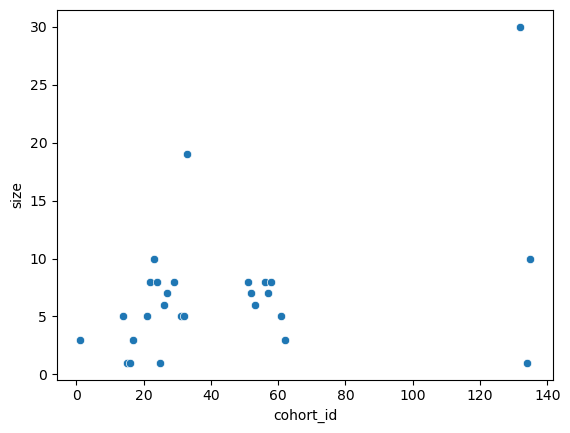

6966    33
Name: cohort_id, dtype: int64
appendix/code-standards/html-css,39,9.703703703703704


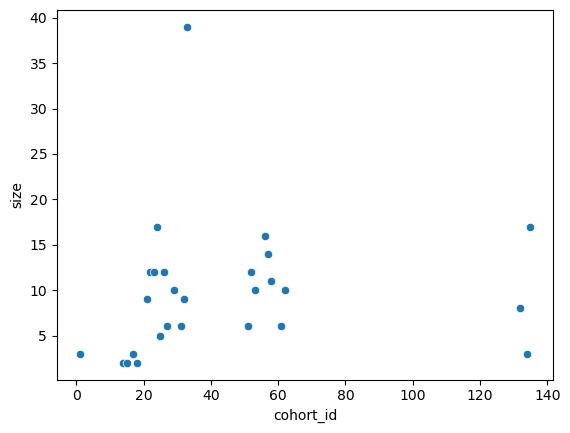

11575    135
Name: cohort_id, dtype: int64
appendix/code-standards/javascript,43,12.931034482758621


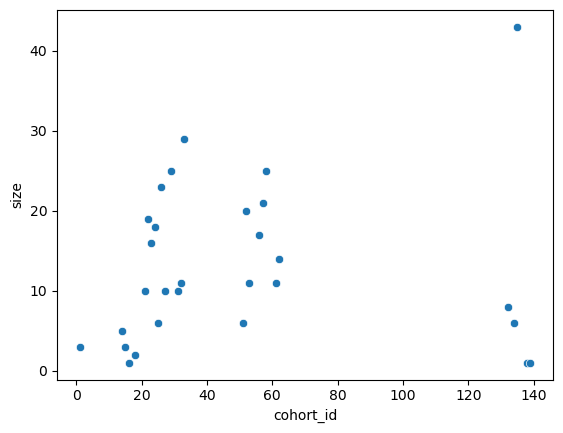

10278    61
Name: cohort_id, dtype: int64
appendix/extra-challenges/basic-challenges,92,20.8


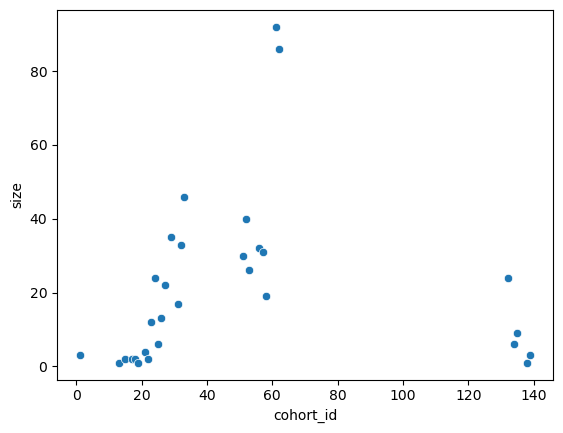

10288    61
Name: cohort_id, dtype: int64
appendix/extra-challenges/sales-tax,29,5.956521739130435


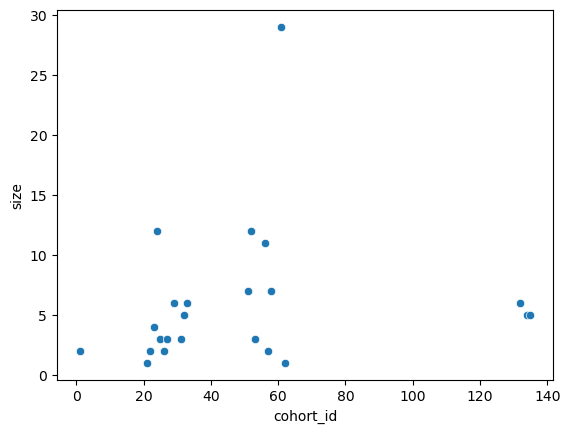

6289    31
Name: cohort_id, dtype: int64
appendix/further-reading/spring/pagination,54,12.76923076923077


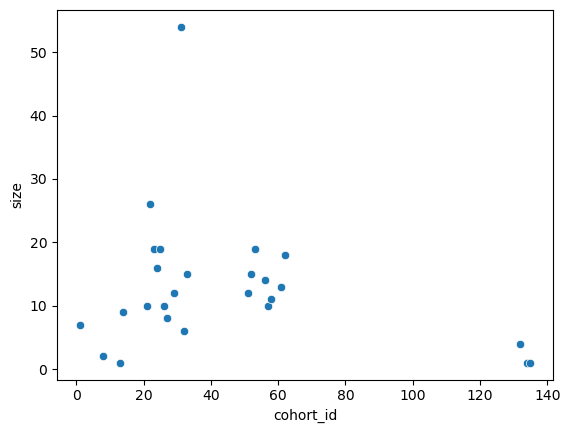

3686    22
Name: cohort_id, dtype: int64
appendix/git/merge-conflict-demo,30,7.032258064516129


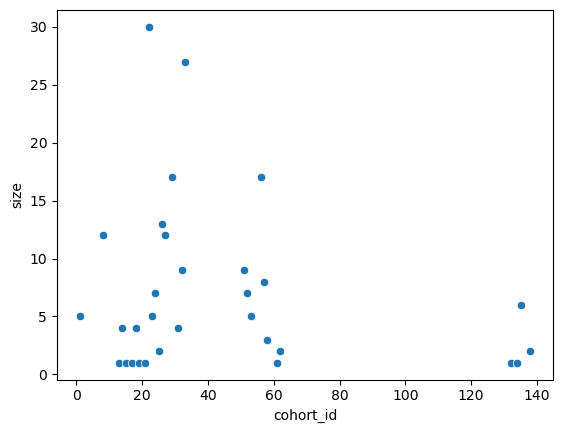

1200    13
Name: cohort_id, dtype: int64
content/laravel/intro,83,12.368421052631579


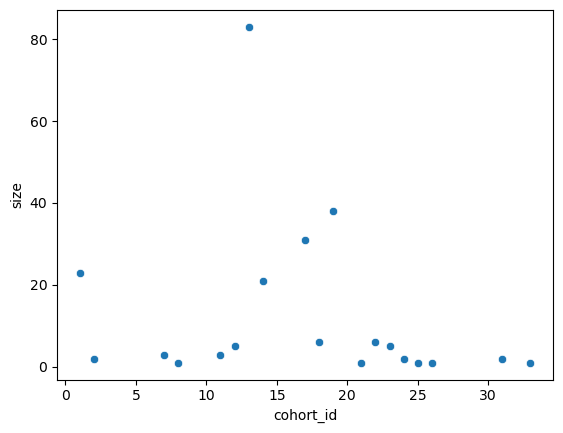

1201    13
Name: cohort_id, dtype: int64
content/laravel/intro/application-structure.html,63,10.923076923076923


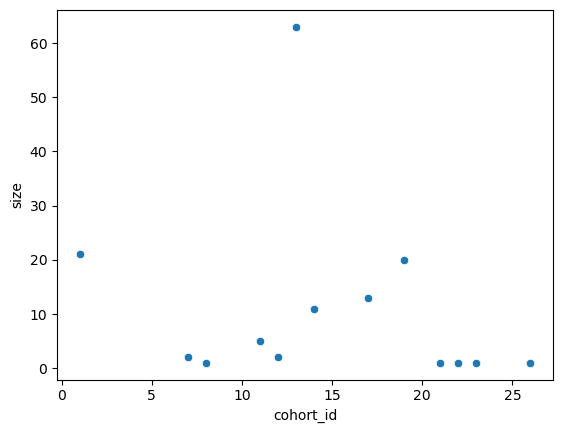

1203    13
Name: cohort_id, dtype: int64
content/laravel/intro/gitbook/images/favicon.ico,56,7.235294117647059


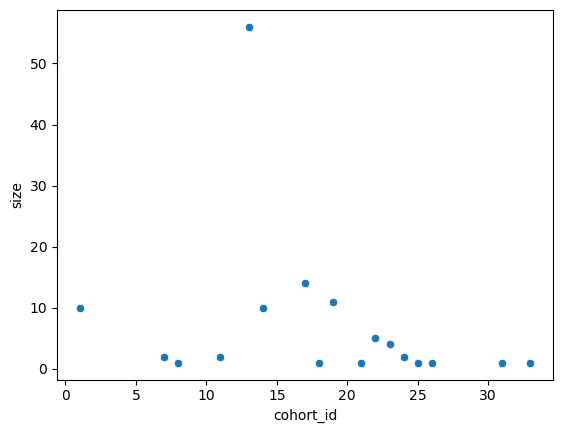

2435    17
Name: cohort_id, dtype: int64
content/php_ii,51,9.0


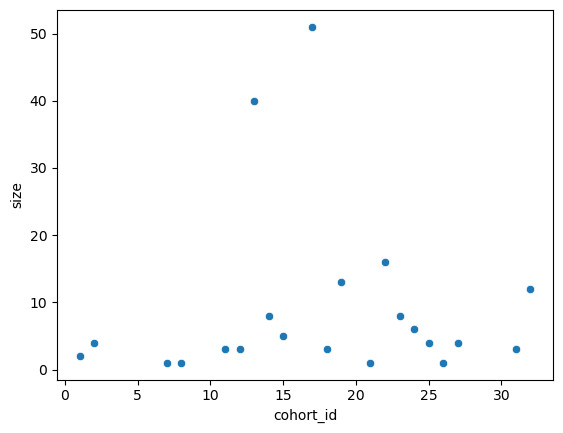

1314    13
Name: cohort_id, dtype: int64
content/php_iii,47,7.857142857142857


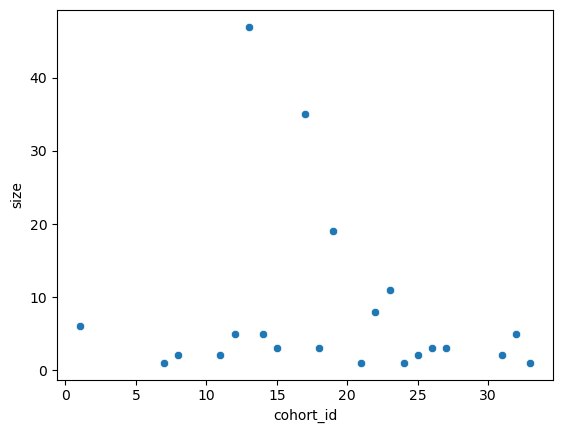

1315    13
Name: cohort_id, dtype: int64
content/php_iii/classes-and-objects-i,18,3.3846153846153846


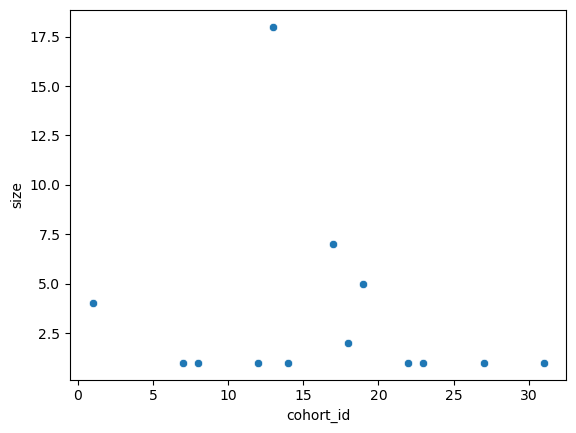

1320    13
Name: cohort_id, dtype: int64
content/php_iii/gitbook/images/favicon.ico,23,3.8


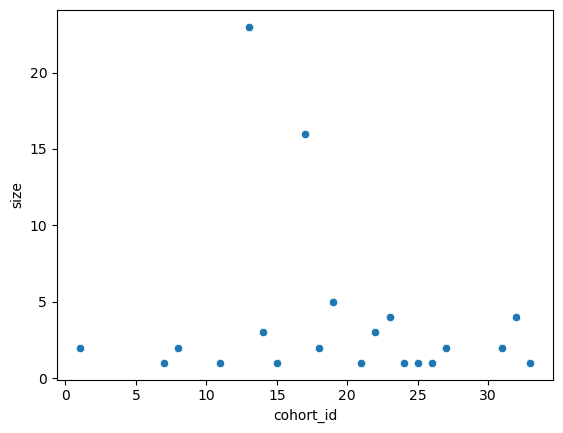

1330    13
Name: cohort_id, dtype: int64
content/php_iv,42,7.8125


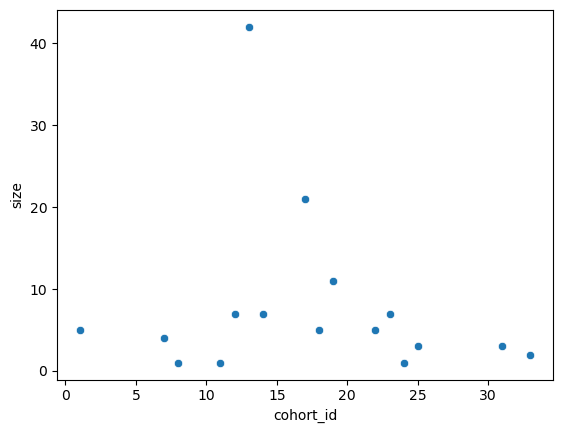

1346    13
Name: cohort_id, dtype: int64
content/php_iv/gitbook/images/favicon.ico,26,4.133333333333334


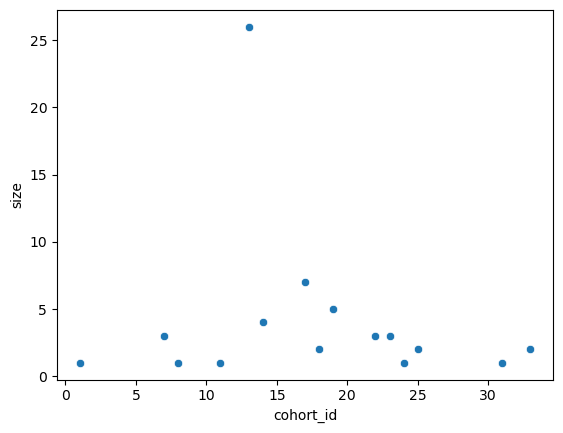

1347    13
Name: cohort_id, dtype: int64
content/php_iv/php-with-mysql,18,4.0


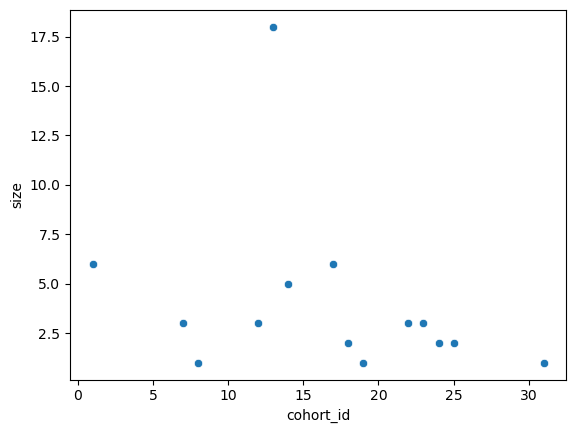

1348    13
Name: cohort_id, dtype: int64
content/php_iv/php-with-mysql/connect-to-db.html,9,2.5384615384615383


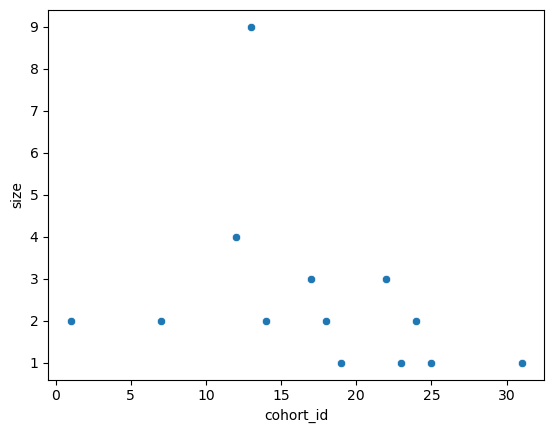

1351    13
Name: cohort_id, dtype: int64
content/php_iv/php-with-mysql/gitbook/images/favicon.ico,16,2.8333333333333335


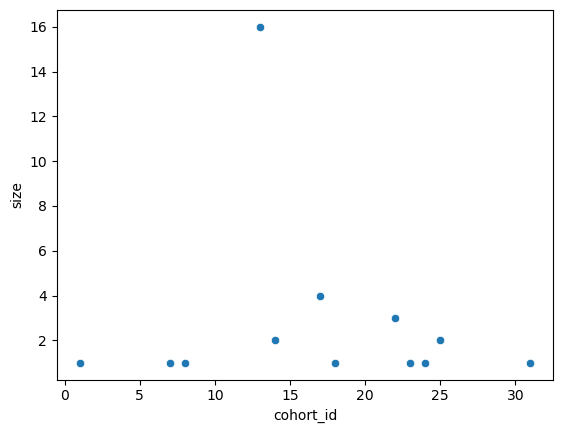

6426    31
Name: cohort_id, dtype: int64
html-css/css-i/flexbox,20,4.3125


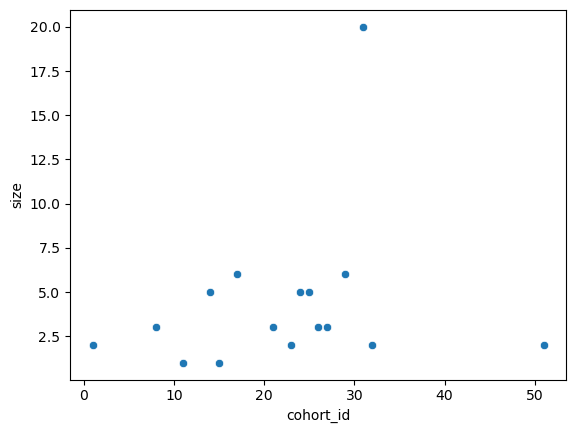

7079    33
Name: cohort_id, dtype: int64
html-css/css-i/introduction,370,111.48387096774194


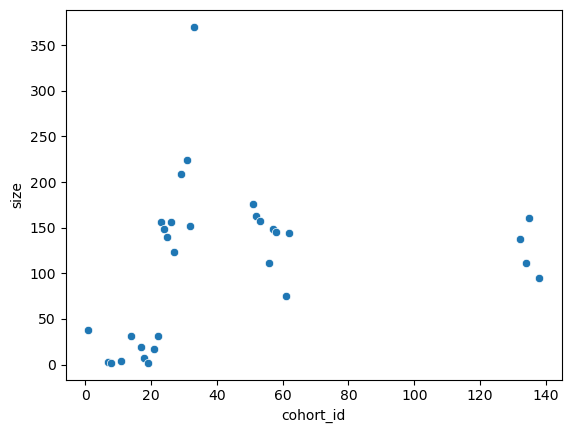

1749    14
Name: cohort_id, dtype: int64
index.html,877,79.57142857142857


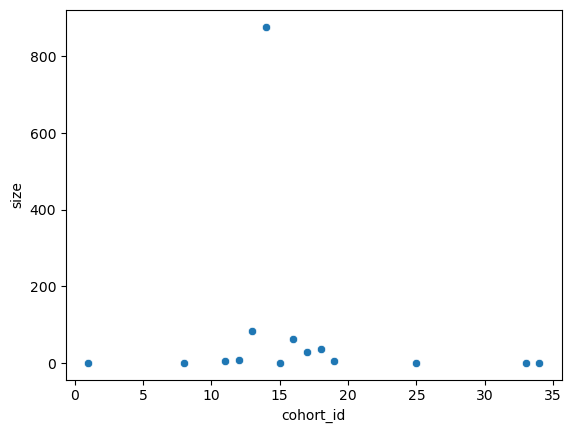

7971    51
Name: cohort_id, dtype: int64
jquery/whack-a-mole/create-game,37,11.571428571428571


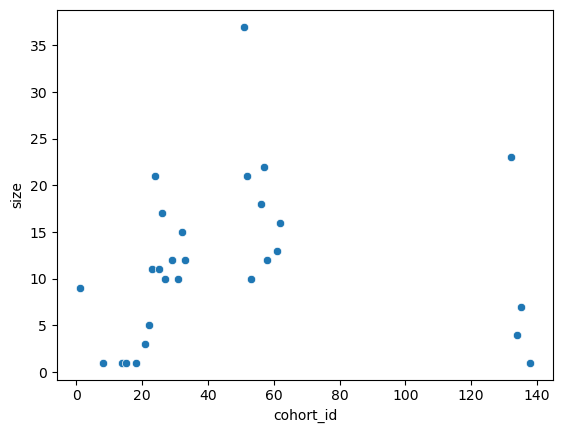

4048    22
Name: cohort_id, dtype: int64
mysql/extra-exercises,44,11.090909090909092


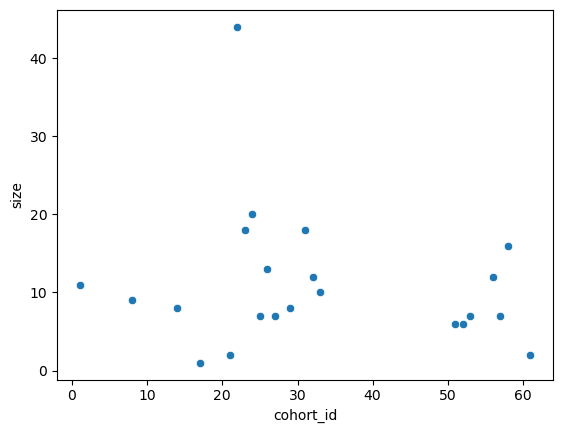

4850    24
Name: cohort_id, dtype: int64
prework/cli,28,5.535714285714286


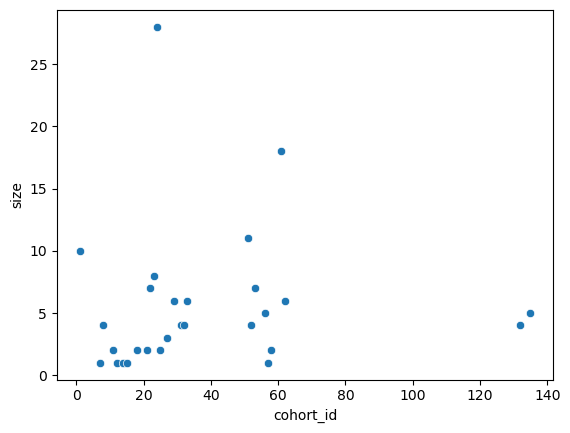

4851    24
Name: cohort_id, dtype: int64
prework/cli/01-intro,21,5.464285714285714


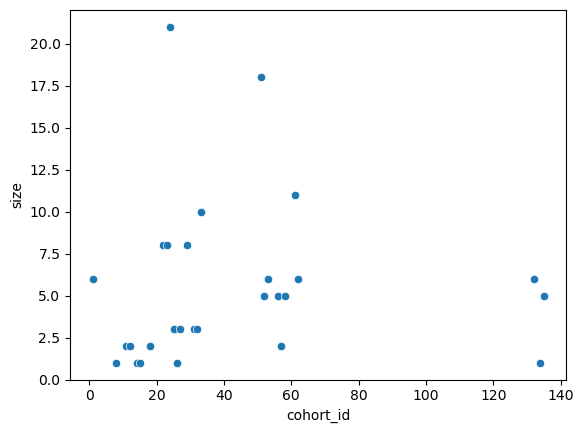

4852    24
Name: cohort_id, dtype: int64
prework/cli/02-listing-files,22,4.703703703703703


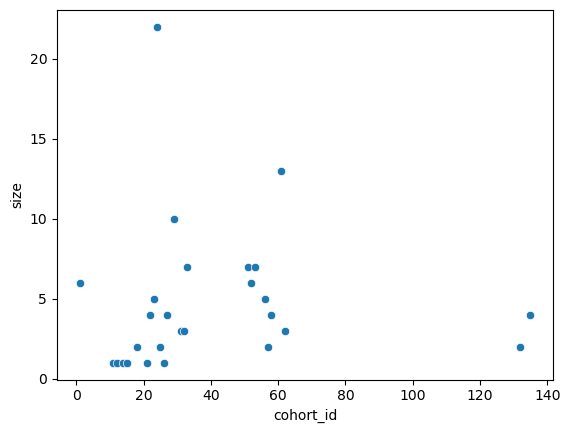

9224    56
Name: cohort_id, dtype: int64
prework/cli/03-file-paths,28,4.8


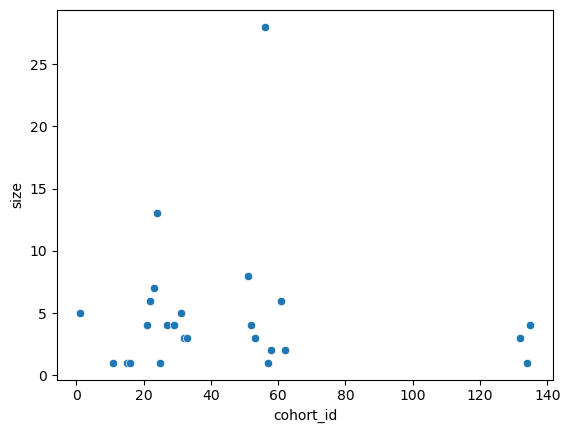

4074    22
Name: cohort_id, dtype: int64
slides/collections,108,16.142857142857142


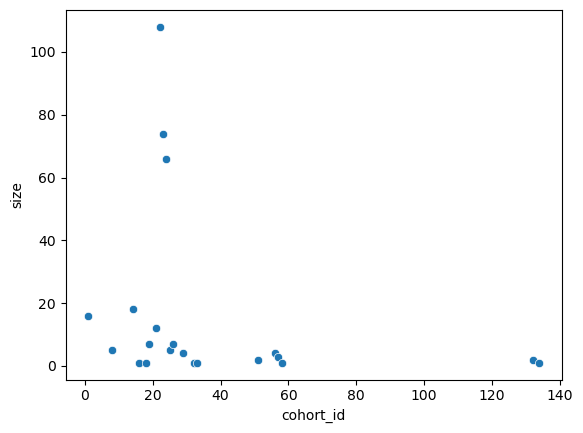

4077    22
Name: cohort_id, dtype: int64
slides/deployment_and_dependencies,94,13.380952380952381


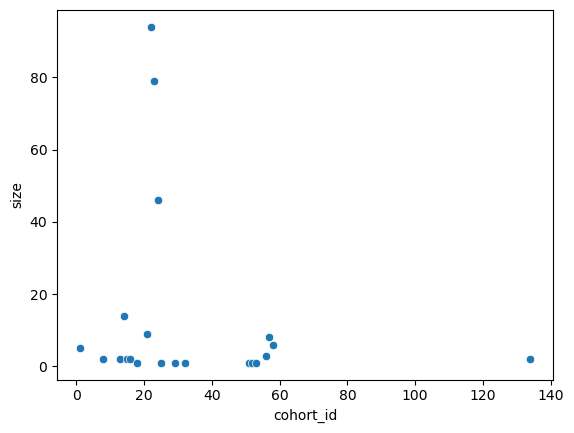

4086    22
Name: cohort_id, dtype: int64
slides/mvc,96,16.22222222222222


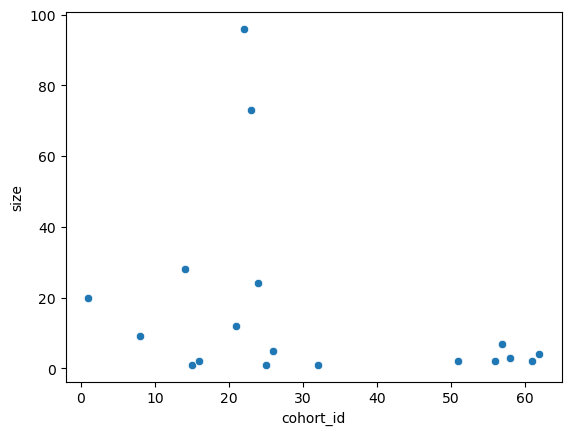

4873    24
Name: cohort_id, dtype: int64
slides/object_oriented_programming,116,18.115384615384617


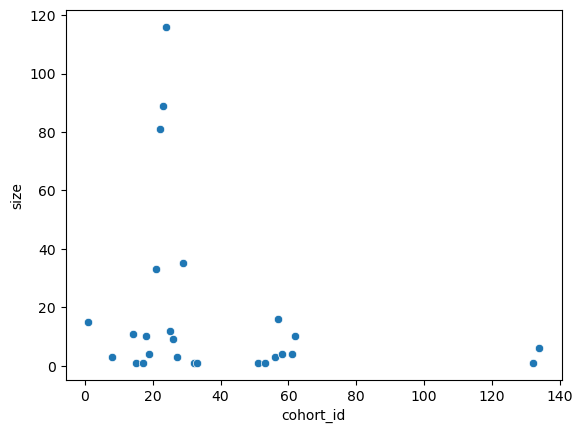

4877    24
Name: cohort_id, dtype: int64
slides/strings,77,11.565217391304348


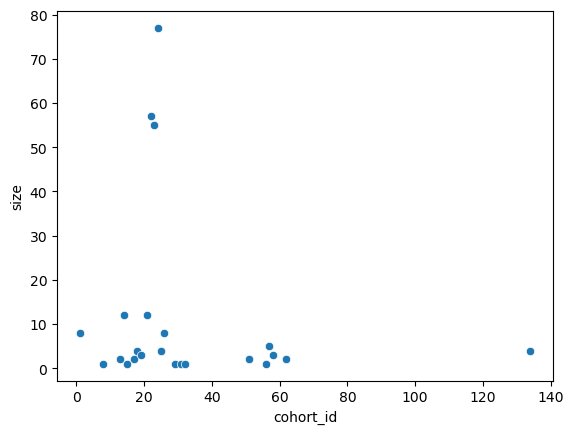

6726    32
Name: cohort_id, dtype: int64
content/php_i/types-and-variables-ii/intro-to-strings-continued.html,19,4.0


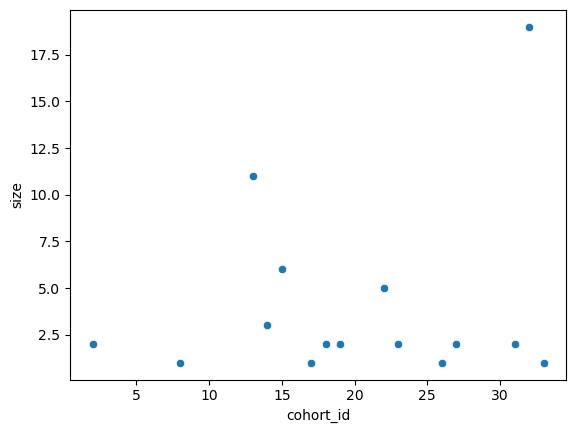

11671    135
Name: cohort_id, dtype: int64
introduction,11,2.9375


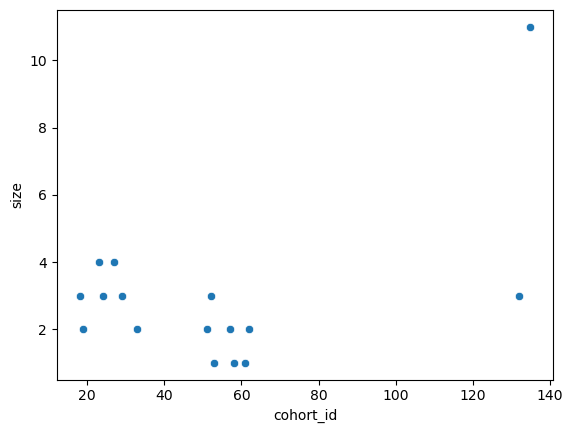

10548    62
Name: cohort_id, dtype: int64
appendix/coding-challenges/amateur,78,9.4


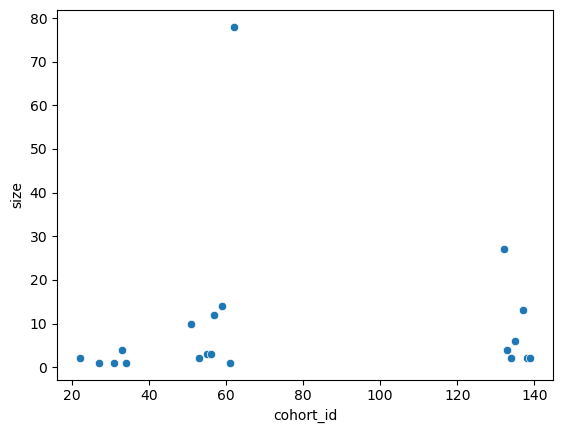

9342    57
Name: cohort_id, dtype: int64
appendix/professional-development/vertical-resume,66,11.5


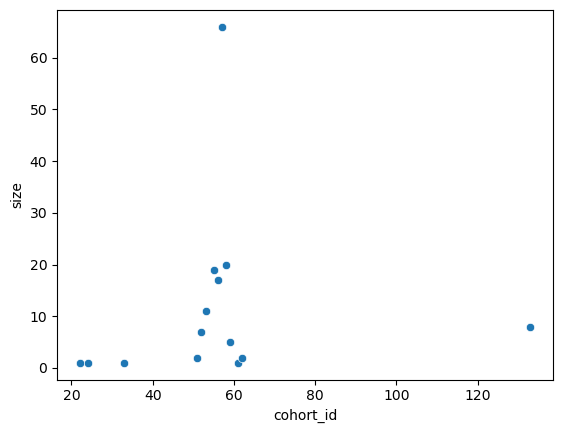

In [11]:
list_of_paths = f.find_outliers(df_combined) 

### Manual entry of the cohort numbers for MVP

In [12]:
list_of_cohorts = [132,33,135,61,61,31,22,13,13,13,17,13,13,13,13,13,13,13,13,31,33,14,51,22,24,24,24,56,22,22,22,24,24,32,135,62,57]

### Zip the list_of_paths with list_of_cohorts and shows as a dataframe

In [17]:
cohort_website = zip(list_of_cohorts, list_of_paths)
zipped_list = pd.DataFrame(list(cohort_website)).rename(columns={0:'Cohort Id', 1:'Website'})
zipped_list

,Cohort Id,Website
0,132,appendix/code-standards
1,33,appendix/code-standards/html-css
2,135,appendix/code-standards/javascript
3,61,appendix/extra-challenges/basic-challenges
4,61,appendix/extra-challenges/sales-tax
5,31,appendix/further-reading/spring/pagination
6,22,appendix/git/merge-conflict-demo
7,13,content/laravel/intro
8,13,content/laravel/intro/application-structure.html
9,13,content/laravel/intro/gitbook/images/favicon.ico


### The above dataframe shows the cohort and path combinations found

## 3. Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students?

## 4. Is there any suspicious activity, such as users/machines/etc accessing the curriculum who shouldn’t be? Does it appear that any web-scraping is happening? Are there any suspicious IP addresses?

## 7.  Which lessons are least accessed?

In [14]:
lessons = df[["program_id", "cohort_id", "path"]]

result_dataframe = f.process_lessons_data(lessons)

In [15]:
result_dataframe

,path,traffic
91,12-distributed-ml/3-getting-started,1
93,12-distributed-ml/4-acquire,1
96,12-distributed-ml/5-inspect,1
108,12-distributed-ml/spark-topics,1
162,2-storytelling/chart-types,1
...,...,...
1800,teams/13,1
1803,timeline/java-i,1
1819,tools/codeup,1
1820,ui/typography,1


## Looking through the lessons with the least traffic which was 1, there were lessons that no longer exist in the current curriculum and had testing titles such as asdfasdf as the lesson name. This tells me that there may at some point have been testing website pages. I would need a current website paths to ensure I am not delivering lessons that were "least accessed" that were never technically a lesson to began with. Using the current data, here are the 5 least visited lessons

- nlp/2-regular-expressions
- nlp/3-acquire
- nlp/exercises
- distributed-ml/3-getting-started
- distributed-ml/4-acquire

*** There are 185 more lessons with a traffic of 1, this is just 5 ***